#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
test = pd.read_csv('mnist_test.csv')
train = pd.read_csv('mnist_train.csv')

In [9]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0     1     2     3     4     5     6     7     8     9     ...  2857  \
1x1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1x5     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
28x24   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x25   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x26   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x27   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28x28   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       2858  2859  2860  2861  2862  28

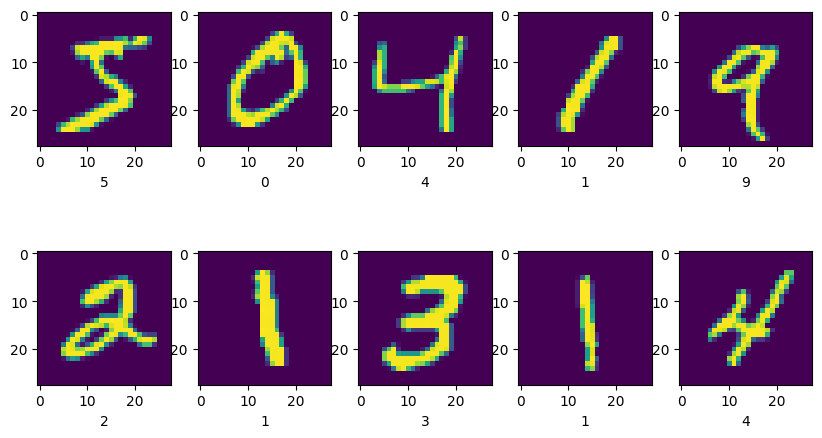

In [10]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [11]:
class ANN:
    def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_layers = num_layers
        self.num_of_nodes_layers = num_of_nodes_layers
        self.weights_biases = {}
        self.activations = {}

    def initial_params(self):
        np.random.seed(20)
        self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
        self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

        for i in range(2, self.num_layers + 1):
            self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
            self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

        self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
        self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

    def RELU(self, Z):
        x = np.maximum(0, Z)
        return x

    def softmax(self, Z):
        Z = Z - np.max(Z, axis=0, keepdims=True)
        exp_Z = np.exp(Z)
        softmax = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
        return softmax

    def forward_propagation(self, X):
        self.activations['A0'] = X
        A = X

        for i in range(1, self.num_layers + 1):
            Z = self.weights_biases[f'W{i}'].dot(A) + self.weights_biases[f'b{i}']
            A = self.RELU(Z)
            self.activations[f'Z{i}'] = Z
            self.activations[f'A{i}'] = A

        Z_last = self.weights_biases[f'W{self.num_layers + 1}'].dot(A) + self.weights_biases[f'b{self.num_layers + 1}']
        A_last = self.softmax(Z_last)
        self.activations[f'Z{self.num_layers + 1}'] = Z_last
        self.activations[f'A{self.num_layers + 1}'] = A_last

        return A_last

    def one_hot_encode(self, y):
        one_hot= np.zeros((self.output_size, y.size))
        one_hot[y, np.arange(y.size)] = 1
        return one_hot

    def total_loss(self, y_pred, Y):
        m = Y.shape[1]
        loss = -np.sum(Y * np.log(y_pred)) / m
        return loss

    def backward_prop(self, y_pred, Y):
        slope = {}
        m = Y.shape[1]
        dZ = y_pred - Y

        for i in reversed(range(1, self.num_layers + 2)):
            dW = (1 / m) * np.dot(dZ, self.activations[f'A{i-1}'].T)
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
            if i > 1:
                dA_prev = np.dot(self.weights_biases[f'W{i}'].T, dZ)
                dZ = dA_prev * (self.activations[f'Z{i-1}'] > 0)

            slope[f'dW{i}'] = dW
            slope[f'db{i}'] = db

        return slope

    def update_params(self, slope):
        for number in range(1, self.num_layers + 2):
            self.weights_biases[f"W{number}"] -= self.learning_rate * slope[f"dW{number}"]
            self.weights_biases[f"b{number}"] -= self.learning_rate * slope[f"db{number}"]

    def train(self, X, y, num_iterations):
        Y = self.one_hot_encode(y)
        self.initial_params()

        for j in range(num_iterations):
            y_pred = self.forward_propagation(X)
            loss = self.total_loss(y_pred, Y)
            slope= self.backward_prop(y_pred, Y)
            self.update_params(slope)

            if j % 100 == 0:
                print(f"Iteration {j}: Loss {loss}")

    def predict(self, X):
        A_last = self.forward_propagation(X)
        prediction = np.argmax(A_last, axis=0)
        return prediction

In [ ]:
class ANN:
    def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_layers = num_layers
        self.num_of_nodes_layers = num_of_nodes_layers
        self.weights_biases = {}
        self.activations = {}

    def initial_params(self):
        np.random.seed(20)
        self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
        self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

        for i in range(2, self.num_layers + 1):
            self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
            self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

        self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
        self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

    def RELU(self, Z):
        x = np.maximum(0, Z)
        return x

    def softmax(self, Z):
        Z = Z - np.max(Z, axis=0, keepdims=True)
        exp_Z = np.exp(Z)
        softmax = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
        return softmax

    def forward_propagation(self, X):
        self.activations['A0'] = X
        A = X

        for i in range(1, self.num_layers + 1):
            Z = self.weights_biases[f'W{i}'].dot(A) + self.weights_biases[f'b{i}']
            A = self.RELU(Z)
            self.activations[f'Z{i}'] = Z
            self.activations[f'A{i}'] = A

        Z_last = self.weights_biases[f'W{self.num_layers + 1}'].dot(A) + self.weights_biases[f'b{self.num_layers + 1}']
        A_last = self.softmax(Z_last)
        self.activations[f'Z{self.num_layers + 1}'] = Z_last
        self.activations[f'A{self.num_layers + 1}'] = A_last

        return A_last

    def one_hot_encode(self, y):
        one_hot= np.zeros((self.output_size, y.size))
        one_hot[y, np.arange(y.size)] = 1
        return one_hot

    def total_loss(self, y_pred, Y):
        m = Y.shape[1]
        loss = -np.sum(Y * np.log(y_pred)) / m
        return loss

    def backward_prop(self, y_pred, Y):
        slope = {}
        m = Y.shape[1]
        dZ = y_pred - Y

        for i in reversed(range(1, self.num_layers + 2)):
            dW = (1 / m) * np.dot(dZ, self.activations[f'A{i-1}'].T)
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
            if i > 1:
                dA_prev = np.dot(self.weights_biases[f'W{i}'].T, dZ)
                dZ = dA_prev * (self.activations[f'Z{i-1}'] > 0)

            slope[f'dW{i}'] = dW
            slope[f'db{i}'] = db

        return slope

    def update_params(self, slope):
        for number in range(1, self.num_layers + 2):
            self.weights_biases[f"W{number}"] -= self.learning_rate * slope[f"dW{number}"]
            self.weights_biases[f"b{number}"] -= self.learning_rate * slope[f"db{number}"]

    def train(self, X, y, num_iterations):
        Y = self.one_hot_encode(y)
        self.initial_params()

        for j in range(num_iterations):
            y_pred = self.forward_propagation(X)
            loss = self.total_loss(y_pred, Y)
            slope= self.backward_prop(y_pred, Y)
            self.update_params(slope)

            if j % 100 == 0:
                print(f"Iteration {j}: Loss {loss}")

    def predict(self, X):
        A_last = self.forward_propagation(X)
        prediction = np.argmax(A_last, axis=0)
        return prediction

In [15]:
class ANN:
    def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_layers = num_layers
        self.num_of_nodes_layers = num_of_nodes_layers
        self.weights_biases = {}
        self.activations = {}

    def initial_params(self):
        np.random.seed(20)
        self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
        self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

        for i in range(2, self.num_layers + 1):
            self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
            self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

        self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
        self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

    def RELU(self, Z):
        x = np.maximum(0, Z)
        return x

    def softmax(self, Z):
        Z = Z - np.max(Z, axis=0, keepdims=True)
        exp_Z = np.exp(Z)
        softmax = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
        return softmax

    def forward_propagation(self, X):
        self.activations['A0'] = X
        A = X

        for i in range(1, self.num_layers + 1):
            Z = self.weights_biases[f'W{i}'].dot(A) + self.weights_biases[f'b{i}']
            A = self.RELU(Z)
            self.activations[f'Z{i}'] = Z
            self.activations[f'A{i}'] = A

        Z_last = self.weights_biases[f'W{self.num_layers + 1}'].dot(A) + self.weights_biases[f'b{self.num_layers + 1}']
        A_last = self.softmax(Z_last)
        self.activations[f'Z{self.num_layers + 1}'] = Z_last
        self.activations[f'A{self.num_layers + 1}'] = A_last

        return A_last

    def one_hot_encode(self, y):
        one_hot= np.zeros((self.output_size, y.size))
        one_hot[y, np.arange(y.size)] = 1
        return one_hot

    def total_loss(self, y_pred, Y):
        m = Y.shape[1]
        loss = -np.sum(Y * np.log(y_pred)) / m
        return loss

    def backward_prop(self, y_pred, Y):
        slope = {}
        m = Y.shape[1]
        dZ = y_pred - Y

        for i in reversed(range(1, self.num_layers + 2)):
            dW = (1 / m) * np.dot(dZ, self.activations[f'A{i-1}'].T)
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
            if i > 1:
                dA_prev = np.dot(self.weights_biases[f'W{i}'].T, dZ)
                dZ = dA_prev * (self.activations[f'Z{i-1}'] > 0)

            slope[f'dW{i}'] = dW
            slope[f'db{i}'] = db

        return slope

    def update_params(self, slope):
        for number in range(1, self.num_layers + 2):
            self.weights_biases[f"W{number}"] -= self.learning_rate * slope[f"dW{number}"]
            self.weights_biases[f"b{number}"] -= self.learning_rate * slope[f"db{number}"]

    def train(self, X, y, num_iterations):
        Y = self.one_hot_encode(y)
        self.initial_params()

        for j in range(num_iterations):
            y_pred = self.forward_propagation(X)
            loss = self.total_loss(y_pred, Y)
            slope= self.backward_prop(y_pred, Y)
            self.update_params(slope)

            if j % 100 == 0:
                print(f"Iteration {j}: Loss {loss}")

    def predict(self, X):
        b = {}

        A,b = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)


        return predictions

In [16]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

Iteration 0: Loss nan
Iteration 100: Loss nan
Iteration 200: Loss nan
Iteration 300: Loss nan
Iteration 400: Loss nan
Iteration 500: Loss nan
Iteration 600: Loss nan
Iteration 700: Loss nan
Iteration 800: Loss nan
Iteration 900: Loss nan
Iteration 1000: Loss nan
Iteration 1100: Loss nan
Iteration 1200: Loss nan
Iteration 1300: Loss nan
Iteration 1400: Loss nan
Iteration 1500: Loss nan
Iteration 1600: Loss nan
Iteration 1700: Loss nan
Iteration 1800: Loss nan
Iteration 1900: Loss nan
Iteration 2000: Loss nan
Iteration 2100: Loss nan
Iteration 2200: Loss nan
Iteration 2300: Loss nan
Iteration 2400: Loss nan
Iteration 2500: Loss nan
Iteration 2600: Loss nan
Iteration 2700: Loss nan
Iteration 2800: Loss nan
Iteration 2900: Loss nan
Iteration 3000: Loss nan
Iteration 3100: Loss nan
Iteration 3200: Loss nan
Iteration 3300: Loss nan
Iteration 3400: Loss nan
Iteration 3500: Loss nan
Iteration 3600: Loss nan
Iteration 3700: Loss nan
Iteration 3800: Loss nan
Iteration 3900: Loss nan


In [13]:

m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')

Accuracy: 8.958837772397095 %


3


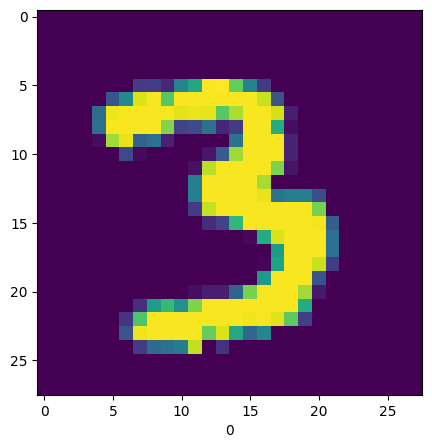

In [14]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
